In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
# import warnings
# warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = os.path.join("data", "mouse_drug_data.csv")
clinical_trial = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug)
clinical_data = pd.read_csv(clinical_trial)


In [2]:
merge_pd = pd.merge(mouse_data, clinical_data, on = "Mouse ID", how = "outer")

## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = pd.DataFrame(merge_pd.groupby(["Drug", "Timepoint"]).mean()).reset_index()

#### The Average Tumor Volume Over the Course of a Drug:

In [4]:
mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [5]:
mean_tumor_vol = mean_tumor_vol[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

In [6]:
pivot_df = mean_tumor_vol.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

In [7]:
pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


#### The Standard Error of Tumor Volumes:

In [8]:
sample_size = pd.DataFrame(merge_pd.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].count()).reset_index()

tumor_vol_std = pd.DataFrame(merge_pd.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].std()).reset_index()

tumor_vol_se = tumor_vol_std["Tumor Volume (mm3)"] /np.sqrt(sample_size["Tumor Volume (mm3)"]) 

std_error_df = tumor_vol_std.assign(tumor_std_err = tumor_vol_se)
std_error_df = std_error_df.pivot(index = "Timepoint", columns = "Drug", values = "tumor_std_err")

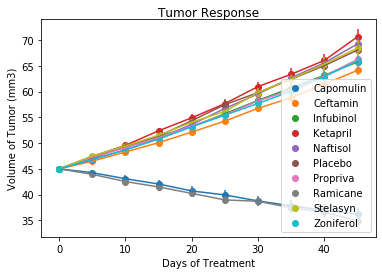

In [21]:
plt.title(label = "Tumor Response", loc = "center", pad = 1.0)
plt.xlabel("Days of Treatment")
plt.ylabel("Volume of Tumor (mm3)")

for e in pivot_df.columns:
    plt.scatter(x = pivot_df.index, y = pivot_df[e])
    
for e in std_error_df.columns:
    plt.errorbar(x = std_error_df.index, y = pivot_df[e], yerr = std_error_df[e])
plt.legend(pivot_df.columns)

plt.savefig("Mean Tumor Response with Std Error")

In [10]:
plt.show("Mean Tumor Response with Std Error")

## Metastatic Response to Treatment

In [11]:
merge_pd.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_sites = pd.DataFrame(merge_pd.groupby(["Drug", "Timepoint"]).mean()).reset_index()
mean_meta_sites = mean_meta_sites[["Drug", "Timepoint", "Metastatic Sites"]]
meta_pivot = mean_meta_sites.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
meta_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [13]:
meta_sample_size = pd.DataFrame(merge_pd.groupby(["Drug", "Timepoint"])["Metastatic Sites"].count()).reset_index()

meta_site_std = pd.DataFrame(merge_pd.groupby(["Drug", "Timepoint"])["Metastatic Sites"].std()).reset_index()

meta_site_se = meta_site_std["Metastatic Sites"] /np.sqrt(meta_sample_size["Metastatic Sites"]) 

meta_se_df = meta_site_std.assign(meta_std_err = meta_site_se)

meta_se_df = meta_se_df.pivot(index = "Timepoint", columns = "Drug", values = "meta_std_err")

In [ ]:
plt.title(label = "Metastatic Sites vs Treatment", loc = "center", pad = 1.0)
plt.xlabel("Days of Treatment")
plt.ylabel("Number of Metastatic Sites")

for e in meta_pivot.columns:
    plt.scatter(x = meta_pivot.index, y = meta_pivot[e])
    
for e in meta_se_df.columns:
    plt.errorbar(x = meta_se_df.index, y = meta_pivot[e], yerr = meta_se_df[e])
plt.legend(meta_pivot.columns)

plt.savefig(fname = "Metastatic Site Response to Treatment")

## Survival Rates

In [15]:
mouse_sample_size = pd.DataFrame(merge_pd.groupby(["Drug", "Timepoint"])["Mouse ID"].count()).reset_index()
mouse_sample_size = mouse_sample_size.pivot(index = "Timepoint", columns = "Drug", values = "Mouse ID")
mouse_sample_size.head()
mouse_survival_rate = (mouse_sample_size/25)*100
mouse_survival_rate.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


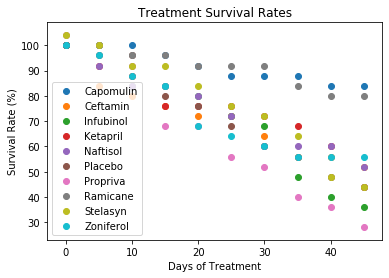

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
plt.title(label = "Treatment Survival Rates", loc = "center")
plt.xlabel("Days of Treatment")
plt.ylabel("Survival Rate (%)")
for e in mouse_survival_rate:
    plt.scatter(mouse_survival_rate.index, mouse_survival_rate[e])
plt.legend(mouse_survival_rate.columns)
plt.figure(num=3, figsize = (100,100))
plt.show()

plt.savefig(fname = "Treatment Survival Rates")

## Summary Bar Graph

In [17]:
pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [18]:
pivot_df.loc[45, "Capomulin"]

36.23611379944762

In [19]:
passing_change = {}
failing_change = {}
for e in pivot_df.columns:
    avg_change = ((pivot_df.loc[45, e] - pivot_df.loc[0, e]) / pivot_df.loc[0, e])*100
    if avg_change < 0:
        passing_change.update({e : avg_change})
    else:
        failing_change.update({e : avg_change})

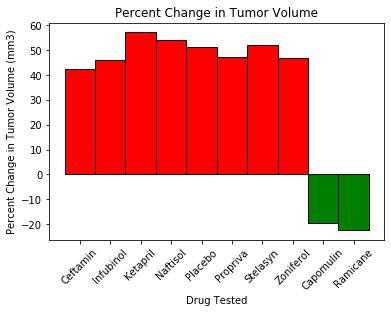

In [20]:
# Orient widths. Add labels, tick marks, etc. 
for k, v in failing_change.items():
    plt.bar(k, v, width = 1.0, color = "red", edgecolor = "black")
    plt.xticks(rotation = 45)
    
for k, v in passing_change.items():
    plt.bar(k, v, width = 1.0, color = "green", edgecolor = "black")
    plt.xticks(rotation = 45)

plt.title("Percent Change in Tumor Volume")
plt.xlabel("Drug Tested")
plt.ylabel("Percent Change in Tumor Volume (mm3)")


# Save the Figure
plt.savefig("Pervent Change in Tumor Volume by Drug Tested")

plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

## Conclusions

1) While Ramicane and Capomulin had the only decreases in tumor volume in this study, they also saw an increase in metastatic sites over the duration of the study. The increases in metastesis however were smaller compared to the other drugs and the placebo. 

2) Propriva had the largest rate of mouse mortality in the study with over 70% of mice given the drug dying by the 45th day of the study. 

3) When looking at the Metastatic Responses, all the drugs tested in this trial had a lesser incidence of metastatic sites appearing compared to the placebo, which might suggest that any treatment may be better than none in terms of preventing metastasis. 